# Predicting heart disease using machine learning

This project is based on determining if a person has some heart disease based on their previous medical data

The original data is from Cleavland data from UCI Machine Learning Repository. A version of it is also available on Kaggle.For more information on the data refer to https://www.kaggle.com/ronitf/heart-disease-uci

## Evaluation

If we can reach 95 % accuracy, we'll pursue the project further

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score , recall_score ,f1_score
from sklearn.metrics import plot_roc_curve

df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


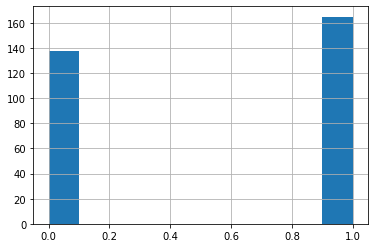

In [10]:
df["target"].hist();  # 1 means the patient has heart disease, 0 means no

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.isna().sum() # Basically our data has no missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.sex.value_counts()    #More males than females

1    207
0     96
Name: sex, dtype: int64

In [15]:
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


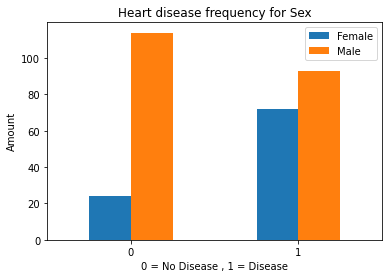

In [23]:
pd.crosstab(df.target , df.sex).plot(kind = "bar")
plt.title("Heart disease frequency for Sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female" , "Male"]);
plt.xticks(rotation = 0);

## Age vs Max. Rate for Heart Disease

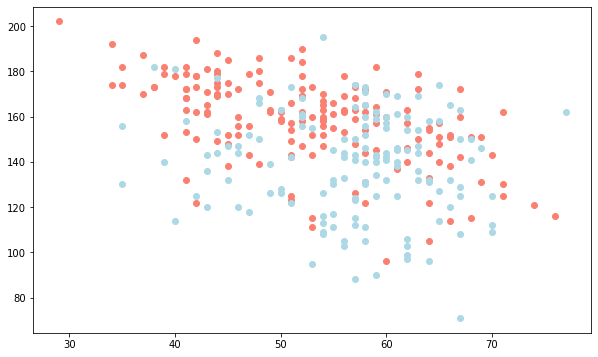

In [22]:
plt.figure(figsize = (10,6))
plt.scatter(df.age[df.target == 1] , df.thalach[df.target == 1] , c = "salmon")
plt.scatter(df.age[df.target == 0] , df.thalach[df.target == 0] , c = "lightblue")
plt.show()

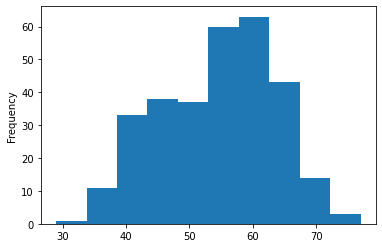

In [25]:
df.age.plot.hist();

# Correlation matrix

In [26]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


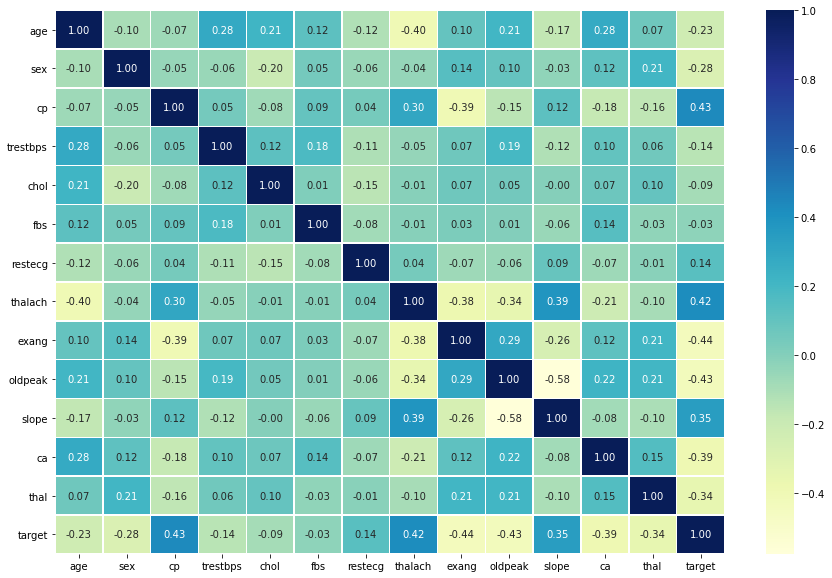

In [31]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix , annot = True , linewidths = 0.5 , fmt = ".2f" , cmap = "YlGnBu");


## Modelling

In [33]:
# split data into x and y
X = df.drop("target" , axis = 1)
y = df["target"]

In [34]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [35]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [36]:
# Split data into train and test set


In [38]:
np.random.seed(4)
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2)

In [43]:
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random forest" : RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(4)
    model_scores = {}
    for name , model in models.items():
        model.fit(X_train , y_train)
        model_scores[name] = model.score(X_test , y_test)
    return model_scores

model_scores = fit_and_score(models , X_train, X_test, y_train, y_test)
model_scores


/home/revati/Vinit/Machine_learning/heart_disease_project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.5737704918032787,
 'Random forest': 0.8688524590163934}

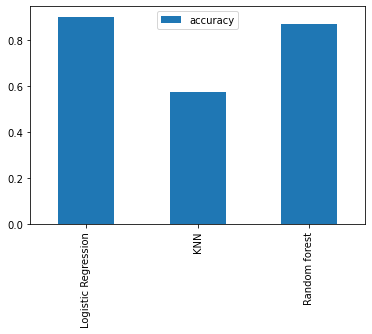

In [47]:
model_compare = pd.DataFrame(model_scores , index = ["accuracy"])
model_compare.T.plot.bar();

## Hyperparameter tuning

In [50]:
train_scores = []
test_scores = []

neighbors = range(1,21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train , y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

([<matplotlib.axis.XTick at 0x7fb200705220>,
 <a list of 20 Text major ticklabel objects>)

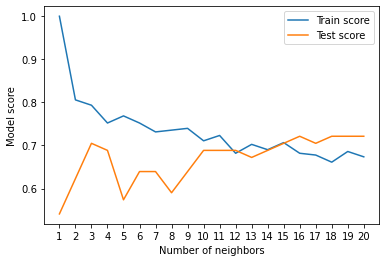

In [53]:
plt.plot(neighbors , train_scores, label = "Train score")
plt.plot(neighbors , test_scores, label = "Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.xticks(np.arange(1,21,1))

## Hyperparameter tuning using RandomizedSearchCV

In [67]:
log_reg_grid = {"C" : np.logspace(-4,4,20),
                "solver" : ["liblinear"]}
rf_grid = {"n_estimators" : np.arange(10 ,1000, 50),
           "max_depth" : [None , 3, 5, 10],
           "min_samples_split" : np.arange(2, 20 , 2),
           "min_samples_leaf" : np.arange(1,20,2)
          }

In [61]:
np.random.seed(4) 

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True
                               )

rs_log_reg.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [62]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [63]:
rs_log_reg.score(X_test , y_test)

0.8688524590163934

In [68]:
np.random.seed(4) 

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True
                               )

rs_rf.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)